In [4]:
import solinv.tyrell.spec as S
import solinv.tyrell.dsl as D
from solinv.tyrell.interpreter import InvariantInterpreter
from solinv.environment import InvariantEnvironment

In [5]:
spec = S.parse_file("./dsls/abstract0.tyrell")
start_type = spec.get_type("Expr")
interpreter = InvariantInterpreter()
env_config = {
    "spec": spec,
    "start_type": start_type,
    "max_step": 6,
    # version options are: 0.4.26, 0.5.17, 0.6.12
    "contracts": [
        # sum(balances) <= totalSupply
        ("./benchmarks/mint_MI.sol", "0.5.17"),
    ],
    "interpreter": interpreter
}
# need to construct the vocab first to provide parameters for nn
tmp_environment = InvariantEnvironment(config=env_config)

['<VAR>', '<VAR>']
{'_balances': 0, '_totalSupply': 1}
{}
2


In [6]:
tmp_environment.contract_encoded_igraph

In [19]:
def plot_ast(env):
    import igraph as ig
    dt = env.contract_igraph
    for p in dt.vs:
        p["label_size"]=7
    for p in dt.es:
        p["label_size"]=7
    visual_style = {}
    visual_style["margin"]=60
    visual_style["bbox"]=(800,600)
    visual_style["vertex_label"] = [
        "{}:{}".format(dt.vs["token"][i], dt.vs[i].index) 
        for i in range(len(dt.vs))
    ]
    visual_style["edge_label"] = [
        ("{}:{}".format(dt.es["token"][i], dt.es[i].index))[:]
        for i in range(len(dt.es))
    ]
    print(len(dt.vs), len(dt.es))
    return ig.plot(dt, **visual_style)

26 29


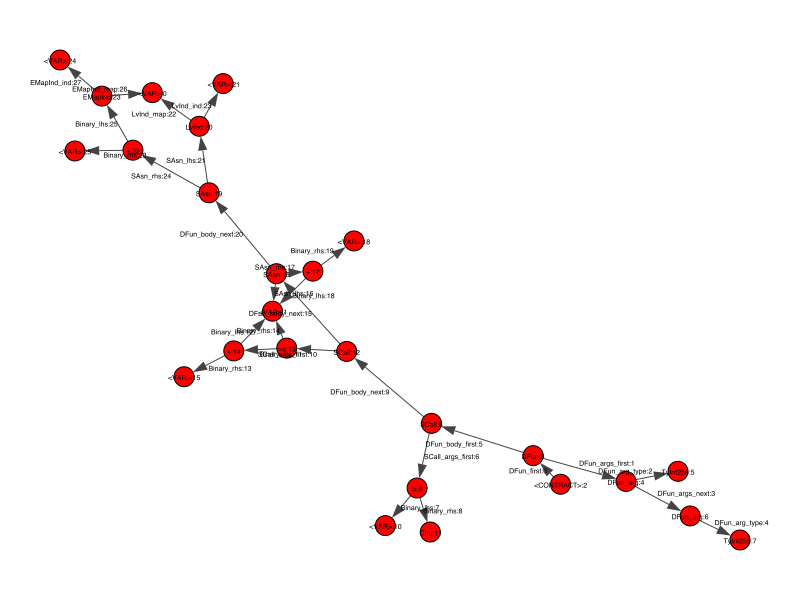

In [20]:
plot_ast(tmp_environment)

In [16]:
dir(tmp_environment.contract_encoded_igraph.vs[0])

['__class__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'all_edges',
 'attribute_names',
 'attributes',
 'betweenness',
 'closeness',
 'constraint',
 'degree',
 'delete',
 'diversity',
 'eccentricity',
 'get_shortest_paths',
 'graph',
 'in_edges',
 'incident',
 'indegree',
 'index',
 'is_minimal_separator',
 'is_separator',
 'neighbors',
 'out_edges',
 'outdegree',
 'pagerank',
 'personalized_pagerank',
 'predecessors',
 'shortest_paths',
 'strength',
 'successors',
 'update_attributes']